In [1]:
# MANIPULACION DE LA DATA
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", None) # MUESTRA TODAS LAS COLUNAS DE UN PANDAS DATAFRAME

# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# QUITAMOS LOS WARNINGS DE LAS SALIDAS DEL NOTEBOOK
import warnings
warnings.filterwarnings("ignore")

# ESTADISTICAS
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, 
# para comprobar si tu muestra se distribuye normalmente o no.

## EDA (Analisis exploratorio de los datos)
Cargamos el dataset y eliminamos la columna con el id, ya que no ofrece nada de correlación real y podríamos estar colocando sesgo a nuestro modelo

In [11]:
df_movies= pd.read_csv("Dataset.csv", sep=',', encoding='utf-8')
df_movies.drop(columns = ['id'], inplace = True) 
df_movies.head()

,belongs_to_collection,genres,spoken_languages,production_companies,production_countries,crew,directors,budget,original_language,popularity,revenue,runtime,title,vote_average,vote_count,release _date,release_year,return
0,Toy Story,"['Animation', 'Comedy', 'Family']",['English'],['Pixar Animation Studios'],['United States of America'],"[('Directing', 'John Lasseter'), ('Writing', '...","['John Lasseter', 'Roman Figun', 'Desirée Mour...",30000000.0,en,21.946943,373554033,81.0,Toy Story,7.7,5415.0,30/10/1995,1995.0,12.451801
1,NaN,"['Adventure', 'Fantasy', 'Family']","['English', 'Français']","['TriStar Pictures', 'Teitler Film', 'Intersco...",['United States of America'],"[('Production', 'Larry J. Franco'), ('Writing'...",['Joe Johnston'],65000000.0,en,17.015539,262797249,104.0,Jumanji,6.9,2413.0,15/12/1995,1995.0,4.043035
2,Grumpy Old Men,"['Romance', 'Comedy']",['English'],"['Warner Bros.', 'Lancaster Gate']",['United States of America'],"[('Directing', 'Howard Deutch'), ('Writing', '...",['Howard Deutch'],0.0,en,11.7129,0,101.0,Grumpier Old Men,6.5,92.0,22/12/1995,1995.0,0.000000
3,NaN,"['Comedy', 'Drama', 'Romance']",['English'],['Twentieth Century Fox Film Corporation'],['United States of America'],"[('Directing', 'Forest Whitaker'), ('Writing',...",['Forest Whitaker'],16000000.0,en,3.859495,81452156,127.0,Waiting to Exhale,6.1,34.0,22/12/1995,1995.0,5.090760
4,Father of the Bride,['Comedy'],['English'],"['Sandollar Productions', 'Touchstone Pictures']",['United States of America'],"[('Sound', 'Alan Silvestri'), ('Camera', 'Elli...",['Charles Shyer'],0.0,en,8.387519,76578911,106.0,Father of the Bride Part II,5.7,173.0,10/02/1995,1995.0,0.000000


### Información Básica

In [12]:
print(f"Hay {df_movies.shape[0]} películas en el dataset")

Hay 45379 películas en el dataset


Inspección de los tipos de las columnas

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  4488 non-null   object 
 1   genres                 45379 non-null  object 
 2   spoken_languages       45379 non-null  object 
 3   production_companies   45379 non-null  object 
 4   production_countries   45379 non-null  object 
 5   crew                   45379 non-null  object 
 6   directors              45379 non-null  object 
 7   budget                 45376 non-null  float64
 8   original_language      45368 non-null  object 
 9   popularity             45377 non-null  object 
 10  revenue                45379 non-null  int64  
 11  runtime                45130 non-null  float64
 12  title                  45376 non-null  object 
 13  vote_average           45376 non-null  float64
 14  vote_count             45376 non-null  float64
 15  re

### Descripción estadística de los datos

In [14]:
pd.set_option('display.float_format', '{:.2f}'.format)
df_movies.describe()

,budget,revenue,runtime,vote_average,vote_count,release_year,return
count,45376.00,45379.00,45130.00,45376.00,45376.00,45376.00,45379.00
mean,4232604.39,11229356.85,94.18,5.62,110.10,1991.88,660.00
std,17439859.56,64387893.11,38.34,1.92,491.74,24.06,74690.83
min,0.00,0.00,0.00,0.00,0.00,1874.00,0.00
25%,0.00,0.00,85.00,5.00,3.00,1978.00,0.00
50%,0.00,0.00,95.00,6.00,10.00,2001.00,0.00
75%,0.00,0.00,107.00,6.80,34.00,2010.00,0.00
max,380000000.00,2787965087.00,1256.00,10.00,14075.00,2020.00,12396383.00


In [15]:
text= df_movies.select_dtypes(include=['object']).columns
text= df_movies[text]
text.describe()

,belongs_to_collection,genres,spoken_languages,production_companies,production_countries,crew,directors,original_language,popularity,title,release _date
count,4488,45379,45379,45379,45379,45379,45379,45368,45377,45376,45376
unique,1693,4068,1843,22668,2389,42966,23372,92,44142,42194,17333
top,The Bowery Boys,['Drama'],['English'],[],['United States of America'],[],[],en,1.00E-06,Cinderella,01/01/2008
freq,29,4998,22380,11799,17846,760,874,32202,30,11,136


### Correlación de las variables

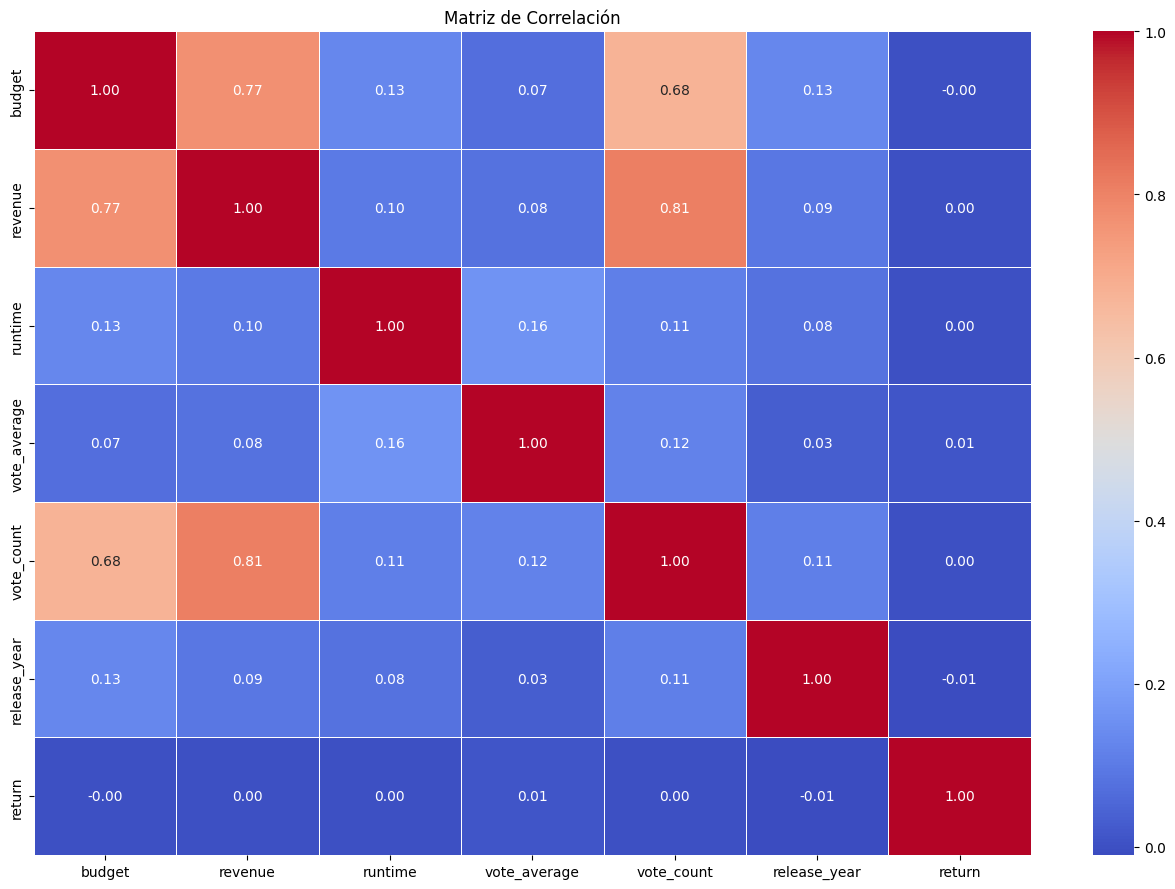

In [16]:
valores_num = df_movies.select_dtypes(include=['number']) 
corr = valores_num.corr().round(2)
plt.figure(figsize=(13,9))
sns.heatmap(data=corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 10})
plt.title("Matriz de Correlación")
plt.tight_layout()
plt.show()

Podemos observar que las variables que tienen una alta correlación positiva son:
-Revenue y Budget
-Vote_count y Revenue
-Budget y Vote_count

Por otro lado, las demás variables muestran una correlación baja o cercana a cero, lo que sugiere una falta de relación lineal significativa entre ellas.

### Outliers

In [17]:
q1 = valores_num.quantile(0.25)
q3 = valores_num.quantile(0.75)
interquartil = q3 - q1 
limite_inf = q1 - 1.5 * interquartil
limite_sup = q3 + 1.5 * interquartil
mascaras = (valores_num < limite_inf) | (valores_num > limite_sup)
outliers = valores_num[mascaras]
outliers

,budget,revenue,runtime,vote_average,vote_count,release_year,return
0,30000000.00,373554033.00,NaN,NaN,5415.00,NaN,12.45
1,65000000.00,262797249.00,NaN,NaN,2413.00,NaN,4.04
2,NaN,NaN,NaN,NaN,92.00,NaN,NaN
3,16000000.00,81452156.00,NaN,NaN,NaN,NaN,5.09
4,NaN,76578911.00,NaN,NaN,173.00,NaN,NaN
...,...,...,...,...,...,...,...
45374,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45375,NaN,NaN,360.00,NaN,NaN,NaN,NaN
45376,NaN,NaN,NaN,NaN,NaN,NaN,NaN
45377,NaN,NaN,NaN,0.00,NaN,1917.00,NaN


### Histograma

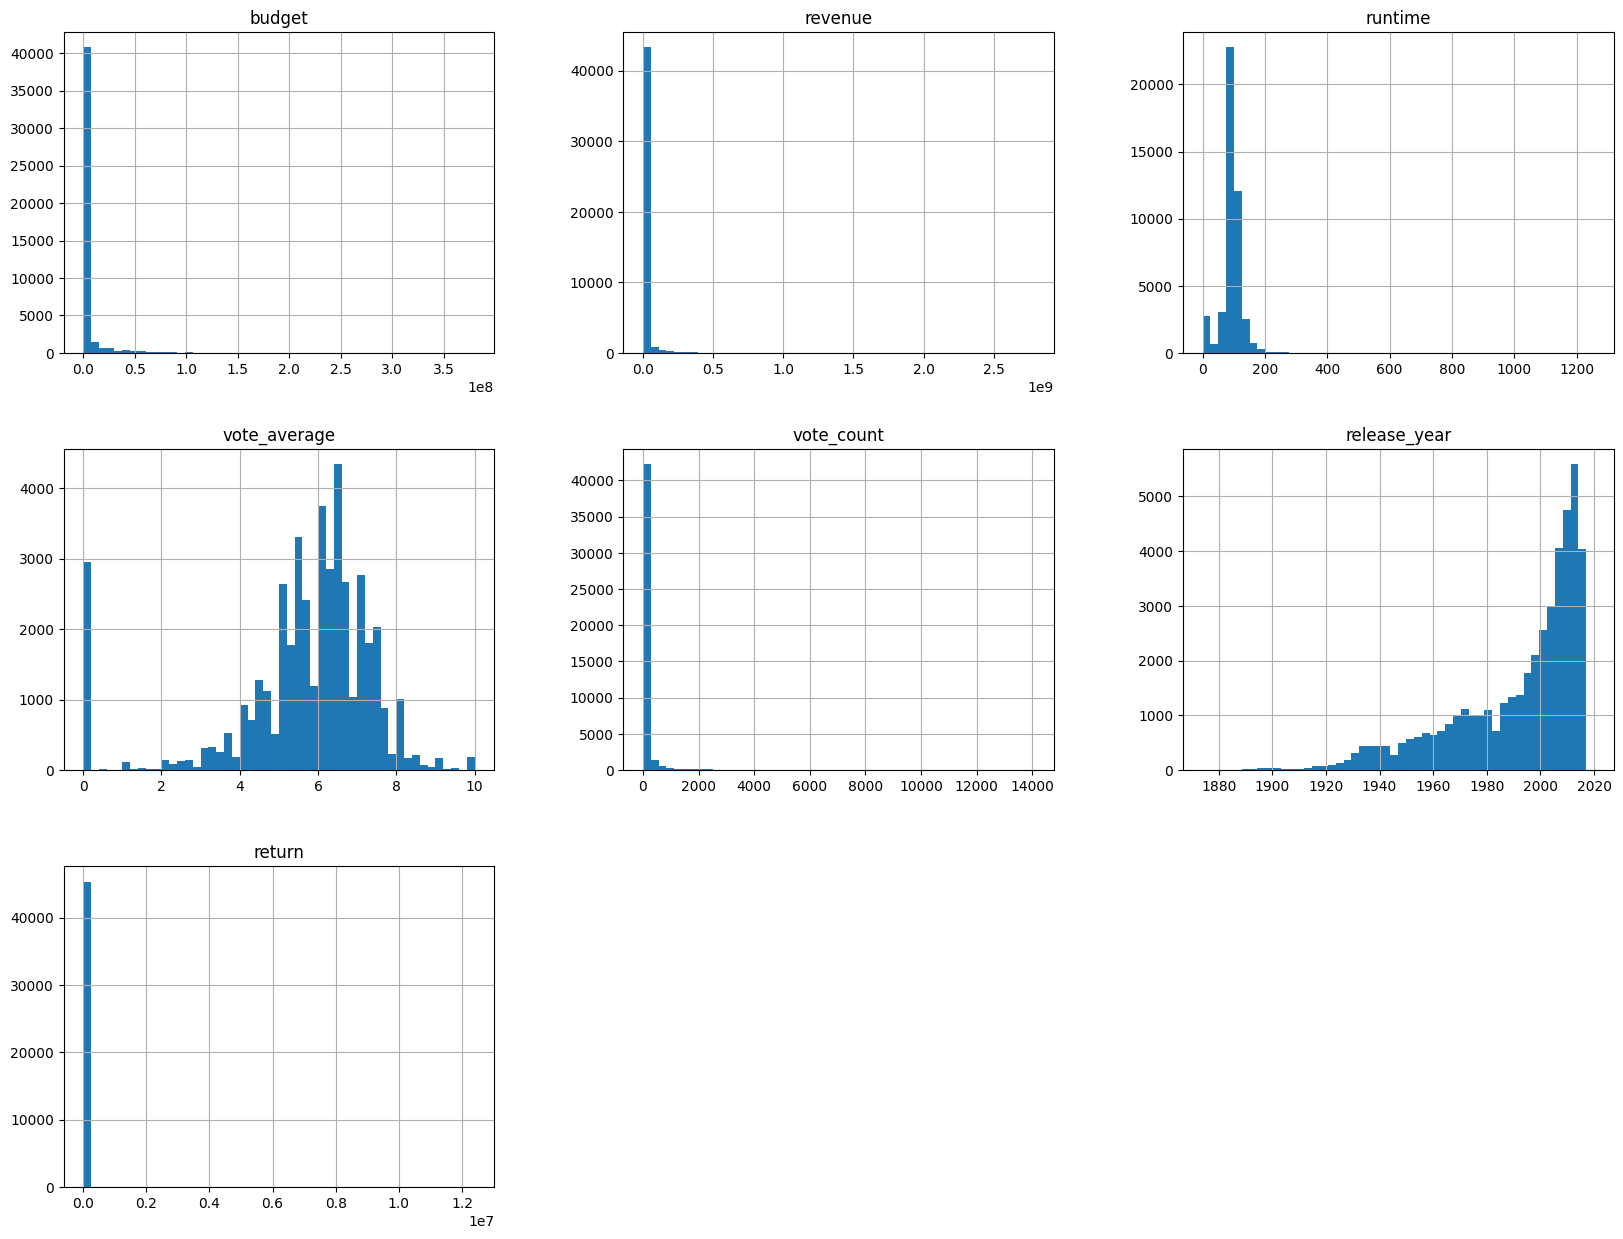

In [18]:

df_movies.hist(bins = 50, figsize= (20,15))
plt.show()


### Normalización de valores

In [19]:

valores_normalizados = (valores_num - valores_num.min()) / (valores_num.max() - valores_num.min())



### Columna objetivo en cuanto a  _Distribucion_, _Outliers_, _Gaussianidad_ 

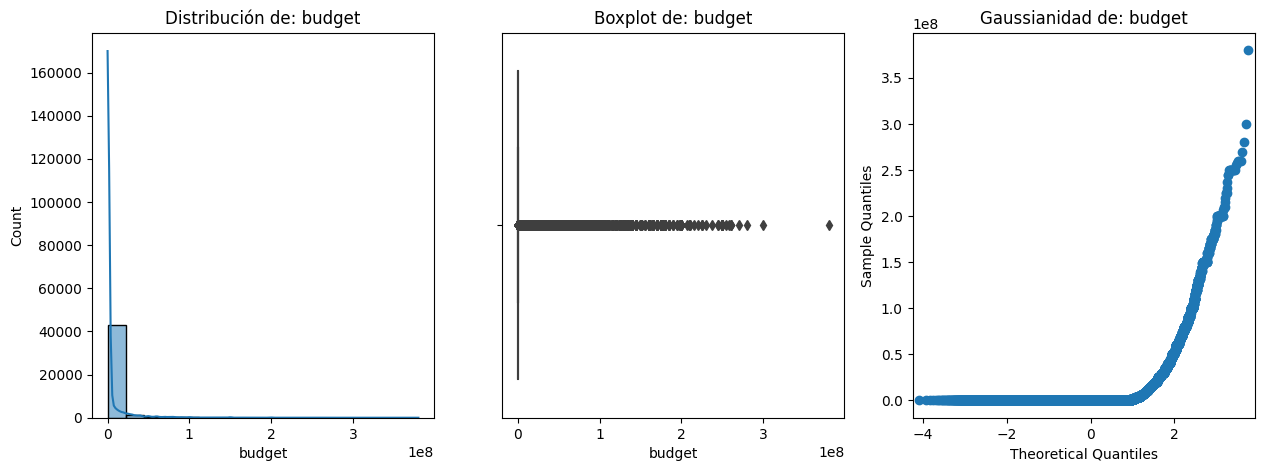

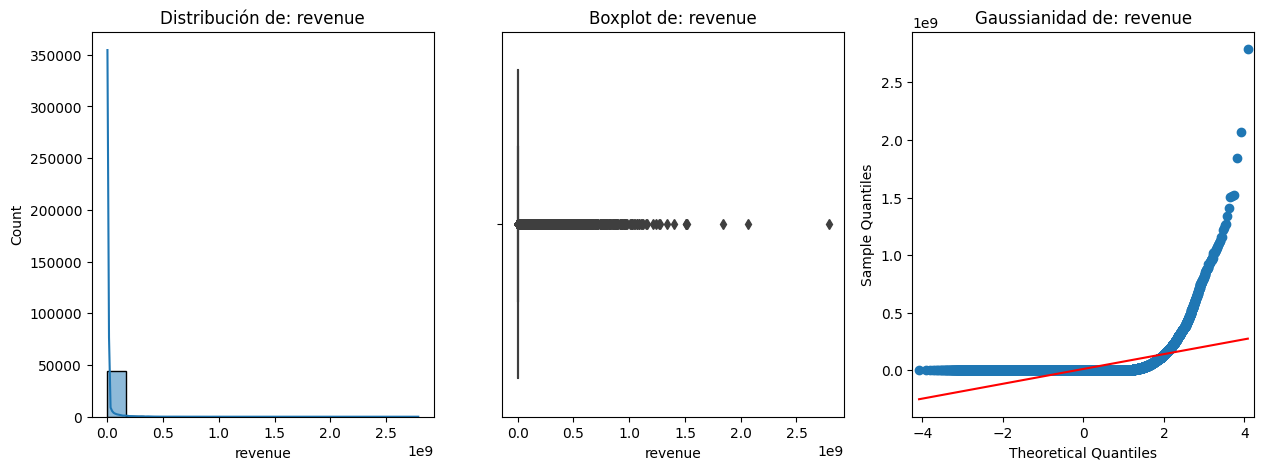

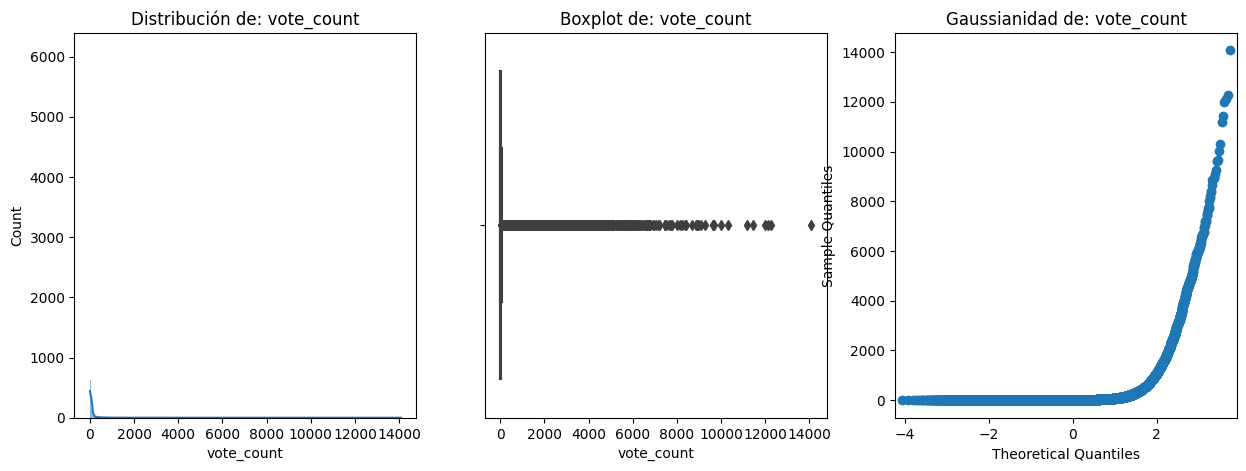

In [20]:

# Gráfico, Boxplot y QQ Plot para la variable 'budget'
variable = 'budget'
y = valores_normalizados[f"{variable}"]
# Configurar la figura con 1 fila y 3 columnas para los subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Gráfico de distribución
ax[0].set_title(f"Distribución de: {variable}")
sns.histplot(data=valores_num, x=f"{variable}", kde=True, ax=ax[0])
# Boxplot
ax[1].set_title(f"Boxplot de: {variable}")
sns.boxplot(data=valores_num, x=f"{variable}", ax=ax[1])
# QQ Plot
ax[2].set_title(f"Gaussianidad de: {variable}")
qqplot(valores_num[f"{variable}"], line='s', ax=ax[2])
# Mostrar los gráficos para la variable 'budget'
plt.show()


# Gráfico, Boxplot y QQ Plot para la variable 'revenue'
variable = 'revenue'
y = valores_normalizados[f"{variable}"]
# Configurar la figura con 1 fila y 3 columnas para los subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Gráfico de distribución
ax[0].set_title(f"Distribución de: {variable}")
sns.histplot(data=valores_num, x=f"{variable}", kde=True, ax=ax[0])
# Boxplot
ax[1].set_title(f"Boxplot de: {variable}")
sns.boxplot(data=valores_num, x=f"{variable}", ax=ax[1])
# QQ Plot
ax[2].set_title(f"Gaussianidad de: {variable}")
qqplot(valores_num[f"{variable}"], line='s', ax=ax[2])
# Mostrar los gráficos para la variable 'revenue'
plt.show()


# Gráfico, Boxplot y QQ Plot para la variable 'vote_count'
variable = 'vote_count'
y = valores_normalizados[f"{variable}"]
# Configurar la figura con 1 fila y 3 columnas para los subplots
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
# Gráfico de distribución
ax[0].set_title(f"Distribución de: {variable}")
sns.histplot(data=valores_num, x=f"{variable}", kde=True, ax=ax[0])
# Boxplot
ax[1].set_title(f"Boxplot de: {variable}")
sns.boxplot(data=valores_num, x=f"{variable}", ax=ax[1])
# QQ Plot
ax[2].set_title(f"Gaussianidad de: {variable}")
qqplot(valores_num[f"{variable}"], line='s', ax=ax[2])
# Mostrar los gráficos para la variable 'vote_count'
plt.show()


- Podemos observar que la distribucion de los precios es bastante sesgada y no gaussiana
- El grafico de boxplot nos indica outliers. 



### Dispersión

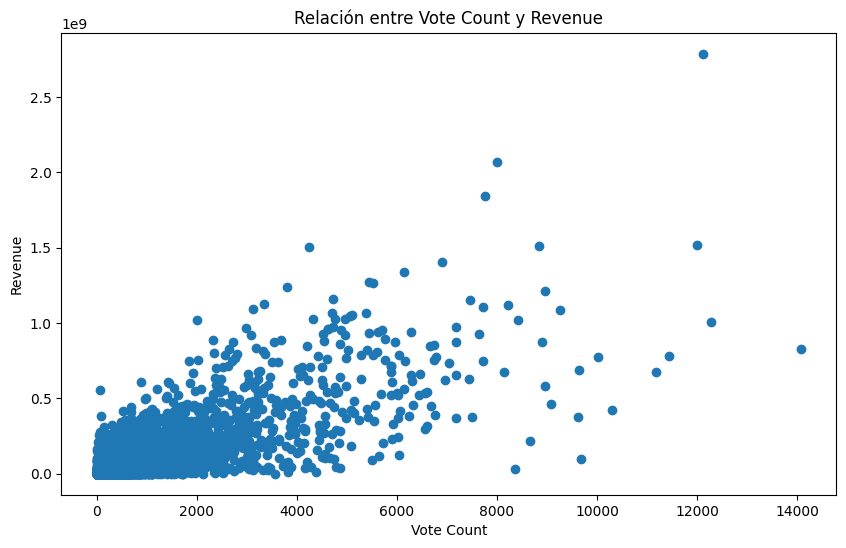

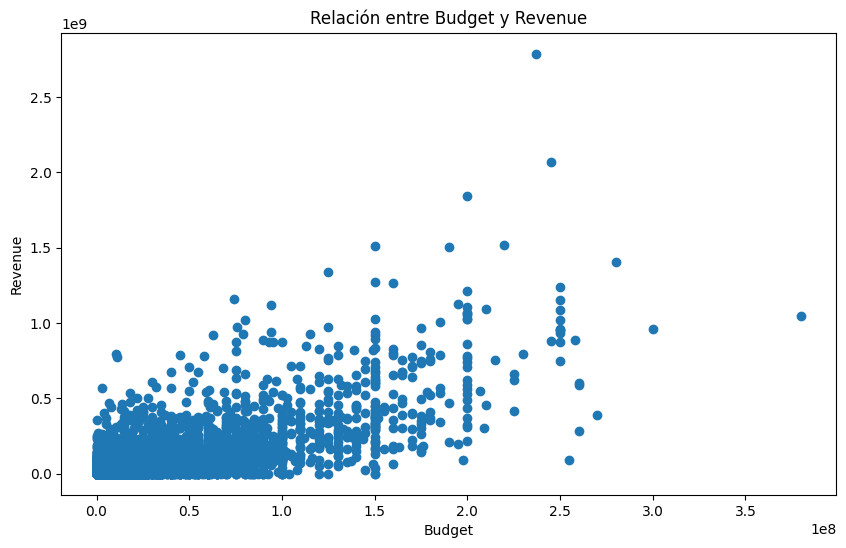

In [21]:

# Gráfico de dispersión 1: Vote Count vs Revenue
x = df_movies['vote_count']
y = df_movies['revenue']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Añadir etiquetas y título al gráfico
plt.xlabel('Vote Count')  # Etiqueta del eje x
plt.ylabel('Revenue')  # Etiqueta del eje y
plt.title('Relación entre Vote Count y Revenue')  # Título del gráfico

# Mostrar el gráfico de dispersión
plt.show()

# Gráfico de dispersión 2: Budget vs Revenue
x = df_movies['budget']
y = df_movies['revenue']

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el gráfico de dispersión
plt.scatter(x, y)

# Añadir etiquetas y título al gráfico
plt.xlabel('Budget')  # Etiqueta del eje x
plt.ylabel('Revenue')  # Etiqueta del eje y
plt.title('Relación entre Budget y Revenue')  # Título del gráfico

# Mostrar el gráfico de dispersión
plt.show()





### Nubes de palabras

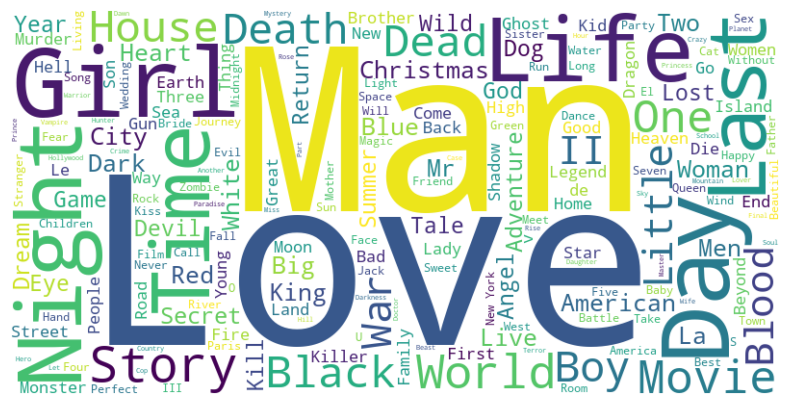

In [28]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

#Title
def generate_wordcloud(texts):
    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'title' column into a single list
all_text = df_movies['title'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)


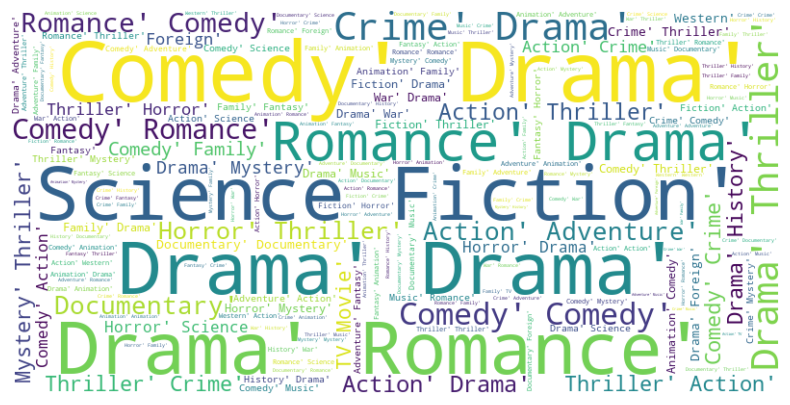

In [29]:
#genres

def generate_wordcloud(texts):
    # Combine all the texts into a single string
    combined_text = ' '.join(str(text) for text in texts)

    # Create the word cloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

# Combine all the text from the 'genres' column into a single list
all_text = df_movies['genres'].tolist()

# Apply the function to the combined text
generate_wordcloud(all_text)


### Sistema de recomendaciones

In [7]:

from fastapi import FastAPI
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

app = FastAPI()

df_movies = pd.read_csv('Dataset.csv')


@app.get("/recomendacion/{titulo}")
def recomendacion(titulo: str):
    pelicula_referencia = df_movies[df_movies['title'] == titulo]
    
    if pelicula_referencia.empty:
        return "No se encontró la película de referencia."
    
    # Obtener la puntuación de la película de referencia
    puntuacion_referencia = pelicula_referencia['vote_average'].iloc[0]

    # Eliminar filas con valores faltantes en la columna de puntuación
    df_cleaned = df_movies.dropna(subset=['vote_average'])

    # Calcular la similitud de puntuación entre la película de referencia y el resto de películas
    df_cleaned['similarity'] = df_cleaned['vote_average'].apply(lambda x: cosine_similarity([[puntuacion_referencia]], [[x]])[0][0])

    # Ordenar las películas por score de similaridad en orden descendente
    peliculas_similares = df_cleaned.sort_values('similarity', ascending=False)

    # Excluir la película de referencia de las recomendaciones
    peliculas_similares = peliculas_similares[peliculas_similares['title'] != titulo]

    # Obtener los 5 nombres de las películas con mayor puntaje de similaridad
    peliculas_recomendadas = peliculas_similares.head(5)['title'].tolist()

    return peliculas_recomendadas


In [8]:
titulo_pelicula = "Toy Story"
recomendaciones = recomendacion(titulo_pelicula)
print(recomendaciones)

['Beyond the Reach', 'Da Sweet Blood of Jesus', 'The Longest Ride', 'Man from Reno', 'Five Dances']
